<a href="https://colab.research.google.com/github/curibe965/Fundamentos-Inteligencia-Artificial/blob/main/Red_neuronal_desde_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***BATALLA DE OS BASTARDOS***


In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

<function matplotlib.pyplot.show(close=None, block=None)>

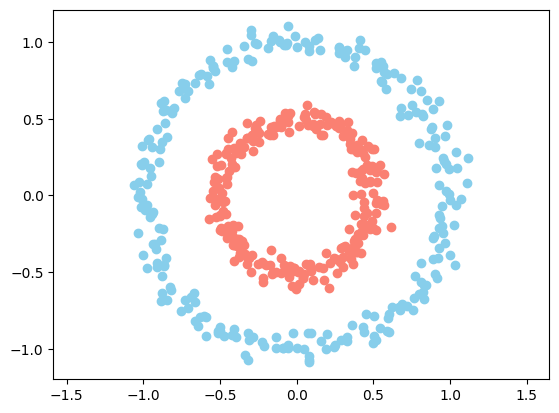

In [ ]:
# crear el dataset

n = 500
p = 2

x, y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)

y = y[:, np.newaxis]

#Toma valores de 0 a 1 porque se trata de un problema de clasificación, en el video serían los buenos o los malos (los bolton o el ejercito del norte)

#plt.scatter(x[:, 0], x[:, 1])
#otra manera de realizar el ploteo sería incluir los datos posibles de y

plt.scatter(x[y[:, 0] == 0, 0], x[y[:, 0] == 0, 1], c = "skyblue")
plt.scatter(x[y[:, 0] == 1, 0], x[y[:, 0] == 1, 1], c = "salmon")
plt.axis("equal")
plt.show


In [ ]:
# Definimos una clase llamada "neural_layer" para representar una capa de una red neuronal
class neural_layer():

  # Inicializador de la clase, que se ejecuta al crear una instancia de esta clase
  def __init__(self, n_conn, n_neur, act_f):

    # Asignamos la función de activación pasada como argumento a la instancia de la capa
    self.act_f = act_f

    # Creamos un vector de sesgos (biases) "b". Este se inicializa con valores aleatorios entre -1 y 1.
    # La dimensión del vector es 1 x n_neur, donde n_neur es el número de neuronas en esta capa.
    self.b = np.random.rand(1, n_neur) * 2 - 1

    # Creamos una matriz de pesos "w" que conecta las neuronas de la capa anterior con esta capa.
    # Se inicializa con valores aleatorios entre -1 y 1.
    # Las dimensiones de la matriz son n_conn x n_neur, donde n_conn es el número de conexiones (neuronas en la capa anterior)
    # y n_neur es el número de neuronas en esta capa.
    self.w = np.random.rand(n_conn, n_neur) * 2 - 1


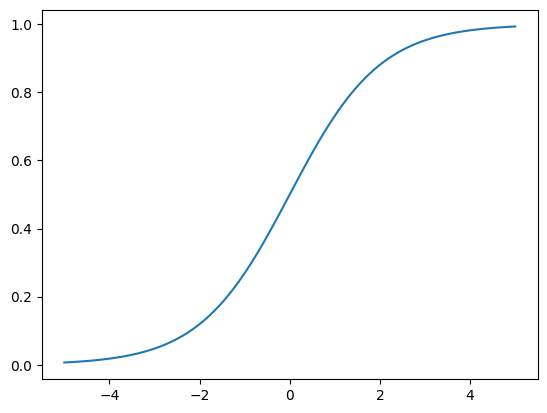

In [ ]:
# Crearemos la función de activación, para deformar la linealidad y
# que no de como resultado una función lineal.

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
       lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)


_x = np.linspace (-5, 5, 100)
plt.plot(_x, sigm[0](_x))
#plt.plot(_x, relu(_x))

In [ ]:
l0 = neural_layer(p, 4, sigm)

l1 = neural_layer(4, 8, sigm)

# ...

# Definimos una función llamada create_nn. Esta función crea una red neuronal
    # basada en una topología dada y una función de activación.
def create_nn(topology, act_f):

  # Creamos una lista vacía llamada nn. Esta lista almacenará las capas de nuestra red neuronal.
  nn = []

  # Iteramos sobre la topología dada, excluyendo el último elemento con [:-1].
  for l, layer in enumerate(topology[:-1]):

    # Añadimos a la lista nn una nueva instancia de neural_layer.
    # El número de conexiones es determinado por el elemento actual de la topología, y el número de neuronas es determinado por el siguiente elemento.
    # La función de activación es la proporcionada en el argumento act_f.
    nn.append(neural_layer(topology[l], topology[l+1], act_f))

    return nn

topology = [p,4,8,1]

create_nn(topology, sigm)


In [ ]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda yp, yr: np.mean((yp - yr)**2),
           lambda yp, yr: (yp - yr))

def train(neural_net, x, y, l2_cost, lr= 0.5, train = True):

  out = [(None, x)]

  #forward pass

  # Iteramos sobre cada capa en la red neuronal (neural_net).
for l, layer in enumerate(neural_net):

     # Calculamos la suma ponderada (z) para la capa actual.
     # Realizamos un producto punto entre la salida de la capa anterior y los pesos de la capa actual.
     # A esto le sumamos los sesgos de la capa actual.
     z = out[-1][1] @ neural_net[l].w + neural_net[l].b

     # Aplicamos la función de activación de la capa actual a z para obtener la activación (a) de la capa.
     a = layer.act_f[0](z)

     # Añadimos la suma ponderada y la activación a la lista 'out'.
     out.append((z, a))

     # Calculamos el costo usando la función 'l2_cost' y lo mostramos.
     print(l2_cost[0](out[-1][1], y))

# Si el argumento 'train' es True, entonces entrenamos la red.
if train:

    # Inicializamos una lista vacía para almacenar los deltas, que son errores calculados durante el backpropagation.
    deltas = []

    # Iteramos en orden inverso sobre cada capa en la red neuronal.
    for i in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      # Si estamos en la última capa, calculamos el delta para esta capa.
      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, y) * neural_net[1].act_f[1](a))

      # Si no estamos en la última capa, calculamos el delta basándonos en el delta de la siguiente capa.
      else:
        deltas.insert(0, deltas[0] @ _w.T * neural_net[1].act_f[1](a))

      # Guardamos los pesos actuales para usar en la siguiente iteración.
      _w = neural_net[l].w

    # Aplicamos el gradiente descendente para actualizar los sesgos y pesos de la capa actual.
    # Esto ajustará la red neuronal para mejorar su precisión.
    neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
    neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr

# Retornamos la activación de la última capa.
return out[-1][1]

# Llamamos a la función 'train' con los argumentos apropiados.
train(neural_net, x, y, l2_cost, 0.5)


0.27743739538952367
0.27556520155801606
0.318337446297867


array([[0.76390915],
       [0.76540325],
       [0.75942412],
       [0.7561463 ],
       [0.75551267],
       [0.76542173],
       [0.75762811],
       [0.76532688],
       [0.75959286],
       [0.76275517],
       [0.76875708],
       [0.76500383],
       [0.76181195],
       [0.76281646],
       [0.76814251],
       [0.76871992],
       [0.75817656],
       [0.76449391],
       [0.75869885],
       [0.76646726],
       [0.75730616],
       [0.76623981],
       [0.76279596],
       [0.76295665],
       [0.75877973],
       [0.76425996],
       [0.76416225],
       [0.75972442],
       [0.75473991],
       [0.75470308],
       [0.75764032],
       [0.76058886],
       [0.76713594],
       [0.76420465],
       [0.76660039],
       [0.76843073],
       [0.7645746 ],
       [0.75963001],
       [0.75597636],
       [0.7579778 ],
       [0.7603015 ],
       [0.75470555],
       [0.76844105],
       [0.76518338],
       [0.75679639],
       [0.76466703],
       [0.76783684],
       [0.758

0.2693935194662658
0.283822149319322
0.31965636618986365
0.2693935194662658
0.283822149319322
0.3322816537081294
0.2693935194662658
0.283822149319322
0.3196533925244835
0.2693935194662658
0.283822149319322
0.33227930970972225
0.2693935194662658
0.283822149319322
0.3196504217686762
0.2693935194662658
0.283822149319322
0.332276963807175
0.2693935194662658
0.283822149319322
0.31964745391729865
0.2693935194662658
0.283822149319322
0.3322746160096892
0.2693935194662658
0.283822149319322
0.3196444889652198
0.2693935194662658
0.283822149319322
0.33227226632645046
0.2693935194662658
0.283822149319322
0.31964152690732067
0.2693935194662658
0.283822149319322
0.3322699147666276
0.2693935194662658
0.283822149319322
0.31963856773849364
0.2693935194662658
0.283822149319322
0.33226756133937335
0.2693935194662658
0.283822149319322
0.3196356114536434
0.2693935194662658
0.283822149319322
0.33226520605382404
0.2693935194662658
0.283822149319322
0.3196326580476858
0.2693935194662658
0.283822149319322
0.33

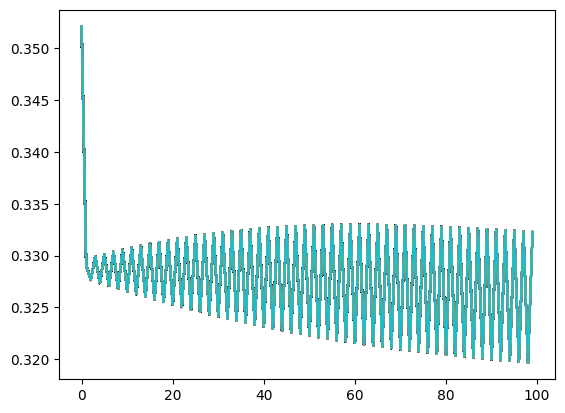

In [ ]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):

  # Entrenamos la red neuronal y obtenemos las predicciones pY.
  pY = train(neural_n, x, y, l2_cost, lr = 0.05)

  # Cada 25 iteraciones, realizamos lo siguiente:
  if i % 25 == 0:

    # Imprimimos las predicciones.
    print(pY)

    # Añadimos el valor de pérdida actual a la lista de pérdidas.
    loss.append(l2_cost[0](pY, y))

    res = 50

    # Generamos un conjunto de puntos en el rango [-1.5, 1.5] para x0 y x1.
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    # Inicializamos una matriz para almacenar los valores de salida de la red neuronal para cada punto (_x0, _x1).
    _y = np.zeros((res, res))

    # Iteramos sobre cada punto (_x0, _x1) y obtenemos la salida de la red neuronal.
    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _y[i0, i1] = train(neural_n, np.array([[x0, x1]]), y, l2_cost, train=False) [0][0]

    # Las siguientes líneas (comentadas) generan una visualización de la salida de la red neuronal para cada punto.
    # También muestran los puntos de datos originales.
    # plt.pcolormesh(_x0,_x1,_y, cmap="coolwarm")
    # plt.axis("equal")
    # plt.scatter(x[y[:, 0] == 0, 0], x[y[:, 0] == 0, 1], c="skyblue")
    # plt.scatter(x[y[:, 0] == 1, 0], x[y[:, 0] == 1, 1], c="salmon")

    # Limpiamos la salida actual para mantener una visualización limpia.
    clear_output(wait=True)

  # Visualizamos cómo cambia la pérdida a lo largo del tiempo.
  plt.plot(range(len(loss)), loss)

plt.show()
